In [2]:
import pandas as pd
import seaborn as sns
import requests
import json

%matplotlib inline

In [3]:
path = 'step_1_lesson_7.csv'

In [4]:
df = pd.read_csv(path)
df

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


In [5]:
people = df[df.user_type == 'People']
robots = df[df.user_type == 'Robots']
people

,date,user_type,visits
0,2020-06-15,People,417.0
2,2020-06-16,People,472.0
4,2020-06-17,People,475.0


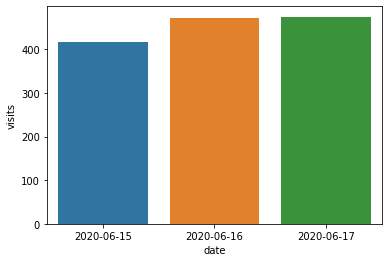

In [6]:
sns.barplot(x=people.date, y=people.visits) # people

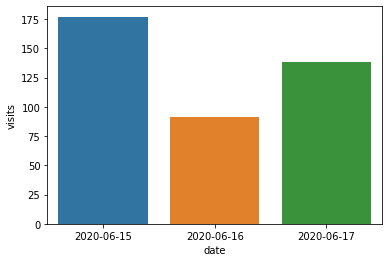

In [7]:
sns.barplot(x=robots.date, y=robots.visits) # robots

In [8]:
import pandas as pd 
import requests 
import json 

In [9]:
metrika_headers = {
    'GET': '/management/v1/counters HTTP/1.1',
    'Host': 'api-metrika.yandex.net',
    'Authorization': 'OAuth AQAAAAA2Bg6XAAdZ7KfNrMesGE86mU7GNK6K2Yk',
    'Content-Type': 'application/x-yametrika+json'
    }

In [10]:
# Base url to service 
url = 'https://api-metrika.yandex.net/stat/v1/data?' 
# &-separated parameters of query in a form of name=value taken from the metrica site 
visits = 'metrics=ym:s:visits&dimensions=ym:s:date&id=44147844' 
url = url + visits 

In [11]:
# Get json of response 
query = requests.get(url, headers=metrika_headers)
query

<Response [200]>

In [12]:
json_data = json.loads(query.text)
json_data

{'query': {'ids': [44147844],
  'dimensions': ['ym:s:date'],
  'metrics': ['ym:s:visits'],
  'sort': ['-ym:s:visits'],
  'date1': '2021-08-29',
  'date2': '2021-09-04',
  'limit': 100,
  'offset': 1,
  'group': 'Week',
  'auto_group_size': '1',
  'attr_name': '',
  'quantile': '50',
  'offline_window': '21',
  'attribution': 'LastSign',
  'currency': 'RUB',
  'adfox_event_id': '0'},
 'data': [{'dimensions': [{'name': '2021-08-31'}], 'metrics': [599.0]},
  {'dimensions': [{'name': '2021-09-01'}], 'metrics': [595.0]},
  {'dimensions': [{'name': '2021-08-30'}], 'metrics': [587.0]},
  {'dimensions': [{'name': '2021-09-02'}], 'metrics': [507.0]},
  {'dimensions': [{'name': '2021-09-03'}], 'metrics': [443.0]},
  {'dimensions': [{'name': '2021-08-29'}], 'metrics': [398.0]},
  {'dimensions': [{'name': '2021-09-04'}], 'metrics': [278.0]}],
 'total_rows': 7,
 'total_rows_rounded': False,
 'sampled': False,
 'contains_sensitive_data': False,
 'sample_share': 1.0,
 'sample_size': 3408,
 'sample_sp

In [13]:
visits_data = pd.DataFrame([(
                             i['dimensions'][0]['name'],
                             i['metrics'][0]) for i in json_data['data']], 
                           columns=['date', 'visits'])
visits_data

,date,visits
0,2021-08-31,599.0
1,2021-09-01,595.0
2,2021-08-30,587.0
3,2021-09-02,507.0
4,2021-09-03,443.0
5,2021-08-29,398.0
6,2021-09-04,278.0


In [14]:
ya = pd.read_csv('step_2_lesson_7.csv')
ya

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [15]:
g_ch = ya[ya.browser == 'Google Chrome'].visits.sum()
g_ch

354.0

In [16]:
total = ya.visits.sum()
total

594.0

In [17]:
g_ch*100/total

59.5959595959596

In [18]:
y = pd.read_csv('step_3_lesson_7.csv')
y

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [19]:
piv = y.pivot(index='browser', columns='user_type', values='visits').fillna(0).reset_index()
piv

user_type,browser,People,Robots
0,Android Browser,1.0,0.0
1,Chrome Mobile,31.0,0.0
2,Chromium,1.0,1.0
3,CocCoc,1.0,0.0
4,Edge,4.0,1.0
5,Firefox,27.0,31.0
6,Google Chrome,250.0,104.0
7,Mobile Safari,15.0,1.0
8,Opera,11.0,5.0
9,Safari,19.0,22.0


In [20]:
res = {}

for line in piv:
    piv['percent'] = piv.Robots/(piv.Robots + piv.People)
#    res[piv.browser] = percent

In [21]:
piv.sort_values('percent')

user_type,browser,People,Robots,percent
0,Android Browser,1.0,0.0,0.000000
1,Chrome Mobile,31.0,0.0,0.000000
3,CocCoc,1.0,0.0,0.000000
12,Vivaldi,1.0,0.0,0.000000
14,Yandex: mobile app,1.0,0.0,0.000000
7,Mobile Safari,15.0,1.0,0.062500
10,Samsung Internet,8.0,1.0,0.111111
13,Yandex Browser,47.0,7.0,0.129630
4,Edge,4.0,1.0,0.200000
6,Google Chrome,250.0,104.0,0.293785


In [22]:
w = pd.read_csv('step_4_lesson_7.csv')
w

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [23]:
wq = w.groupby(['date', 'browser', 'user_type'], as_index=False).agg({'visits' : 'sum'})
wq

,date,browser,user_type,visits
0,2020-06-15,Android Browser,People,1.0
1,2020-06-15,Chrome Mobile,People,31.0
2,2020-06-15,Chromium,People,1.0
3,2020-06-15,Chromium,Robots,1.0
4,2020-06-15,CocCoc,People,1.0
5,2020-06-15,Edge,People,4.0
6,2020-06-15,Edge,Robots,1.0
7,2020-06-15,Firefox,People,27.0
8,2020-06-15,Firefox,Robots,31.0
9,2020-06-15,Google Chrome,People,250.0


In [24]:
wq.dtypes

date          object
browser       object
user_type     object
visits       float64
dtype: object

In [25]:
total = wq.visits.sum()
total

594.0

In [26]:
wq['percent'] = wq.visits.astype('float')*100/total.astype('float')
wq

,date,browser,user_type,visits,percent
0,2020-06-15,Android Browser,People,1.0,0.168350
1,2020-06-15,Chrome Mobile,People,31.0,5.218855
2,2020-06-15,Chromium,People,1.0,0.168350
3,2020-06-15,Chromium,Robots,1.0,0.168350
4,2020-06-15,CocCoc,People,1.0,0.168350
5,2020-06-15,Edge,People,4.0,0.673401
6,2020-06-15,Edge,Robots,1.0,0.168350
7,2020-06-15,Firefox,People,27.0,4.545455
8,2020-06-15,Firefox,Robots,31.0,5.218855
9,2020-06-15,Google Chrome,People,250.0,42.087542


In [27]:
spreadsheet_name = 'project'
sheet='ym'

In [28]:
wq.to_csv('to_google_sheets.csv')

## Закинем файл на Google Sheets и перешлем себе в vk:

In [29]:
import gspread

In [38]:
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials

In [43]:
path_to_credentials = 'psyched-hulling-324717-c55c07ad8737.json'

In [39]:
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

my_mail = 'test-196@psyched-hulling-324717.iam.gserviceaccount.com'

In [44]:
credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credentials, scope)
gs = gspread.authorize(credentials)

In [48]:
sheet = 'Master'
gsheet = d2g.upload(wq, credentials=credentials, row_names=True)

In [53]:
sh = gs.create(sheet)

In [54]:
spreadsheet_url = "https://docs.google.com/spreadsheets/d/%s" % sh.id

In [55]:
spreadsheet_url

'https://docs.google.com/spreadsheets/d/1FU8OLg8qid2jvCRH6OKZU6EYY6REN5V5IRndvFFqLis'

In [56]:
import httplib2
import apiclient.discovery
from oauth2client.service_account import ServiceAccountCredentials

In [57]:
httpAuth = credentials.authorize(httplib2.Http())
service = apiclient.discovery.build('sheets', 'v4', http = httpAuth)

In [ ]:
#driveService = apiclient.discovery.build('drive', 'v3', http = httpAuth)
#shareRes = driveService.permissions().create(
#    fileId = gsheet, #['1FU8OLg8qid2jvCRH6OKZU6EYY6REN5V5IRndvFFqLis'],
#    body = {'type': 'anyone', 'role': 'reader'}  # доступ на чтение кому угодно
#    , fields = '1FU8OLg8qid2jvCRH6OKZU6EYY6REN5V5IRndvFFqLis'
#).execute()

In [63]:
import vk_api

In [64]:
app_token = '64a205fe357b1be5a67296599c1bb3a5811d1adf4909eb4a3dcc93a7f054f4723a30cae1b5d71e4b18995'

In [65]:
chat_id = 1

In [69]:
my_id = 7206022

In [66]:
# Initialize session
vk_session = vk_api.VkApi(token=app_token)

In [67]:
# Make it possible to use vk api methods as python methods
vk = vk_session.get_api()

In [70]:
# Specify path to the file and its future name in the message
path_to_file = 'to_google_sheets.csv'
file_name = 'to_google_sheets.csv'

upload_url = vk.docs.getMessagesUploadServer(peer_id=my_id)["upload_url"]
file = {'file': (file_name, open(path_to_file, 'rb'))}


In [71]:
# Send request to post this doc on vk.com
response = requests.post(upload_url, files=file)

json_data = json.loads(response.text)

In [72]:
saved_file = vk.docs.save(file=json_data['file'], title=file_name)
attachment = 'doc{}_{}'.format(saved_file['doc']['owner_id'], saved_file['doc']['id'])

In [74]:
import random

In [75]:
vk.messages.send(
    user_id=my_id,  # id of chat where to send
    random_id=random.randint(1, 2 ** 31),  # random number for message identification
    message='Привёз посылку для вашего мальчика!',  # message text, optional here
    attachment=attachment)  # attachment name

1

In [31]:
from io import BytesIO
import requests

In [32]:
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content


In [33]:
dd = pd.read_csv(BytesIO(data))
dd

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0
5,2020-06-15,Firefox,People,26.0
6,2020-06-15,Safari,Robots,20.0
7,2020-06-15,Safari,People,17.0
8,2020-06-15,Mobile Safari,People,14.0
9,2020-06-15,Opera,People,10.0


In [34]:
all_data = wq.merge(dd, on=['date', 'browser', 'user_type'], how='inner')
all_data

,date,browser,user_type,visits,percent,users
0,2020-06-15,Android Browser,People,1.0,0.168350,1.0
1,2020-06-15,Chrome Mobile,People,31.0,5.218855,30.0
2,2020-06-15,Chromium,People,1.0,0.168350,1.0
3,2020-06-15,Chromium,Robots,1.0,0.168350,1.0
4,2020-06-15,CocCoc,People,1.0,0.168350,1.0
5,2020-06-15,Edge,People,4.0,0.673401,4.0
6,2020-06-15,Edge,Robots,1.0,0.168350,1.0
7,2020-06-15,Firefox,People,27.0,4.545455,26.0
8,2020-06-15,Firefox,Robots,31.0,5.218855,29.0
9,2020-06-15,Google Chrome,People,250.0,42.087542,240.0


In [35]:
all_data['visits_per_user'] = all_data.visits / all_data.users
all_data

,date,browser,user_type,visits,percent,users,visits_per_user
0,2020-06-15,Android Browser,People,1.0,0.168350,1.0,1.000000
1,2020-06-15,Chrome Mobile,People,31.0,5.218855,30.0,1.033333
2,2020-06-15,Chromium,People,1.0,0.168350,1.0,1.000000
3,2020-06-15,Chromium,Robots,1.0,0.168350,1.0,1.000000
4,2020-06-15,CocCoc,People,1.0,0.168350,1.0,1.000000
5,2020-06-15,Edge,People,4.0,0.673401,4.0,1.000000
6,2020-06-15,Edge,Robots,1.0,0.168350,1.0,1.000000
7,2020-06-15,Firefox,People,27.0,4.545455,26.0,1.038462
8,2020-06-15,Firefox,Robots,31.0,5.218855,29.0,1.068966
9,2020-06-15,Google Chrome,People,250.0,42.087542,240.0,1.041667


In [36]:
all_data[(all_data.browser == 'Google Chrome') & (all_data.user_type == 'Robots')]

,date,browser,user_type,visits,percent,users,visits_per_user
10,2020-06-15,Google Chrome,Robots,104.0,17.508418,104.0,1.0
